In [153]:
# initializations and imports
import matplotlib as plt
import numpy as np
from qiskit import QuantumCircuit, transpile, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

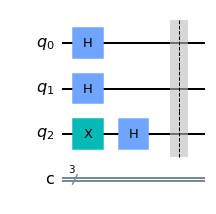

In [154]:
# create the quantum circuit with 2 or 3 qubits
# last qubit is the oracles working qubit which stays in state ket "-" applying the kickback technique

nb_qubits = 2
circuit = QuantumCircuit(nb_qubits + 1, nb_qubits + 1)

# apply Gate H in all input qubits
for qubit in range(0, nb_qubits + 1) :
    if qubit == nb_qubits:
        circuit.x(qubit)

    circuit.h(qubit)

circuit.barrier()

circuit.draw('mpl')

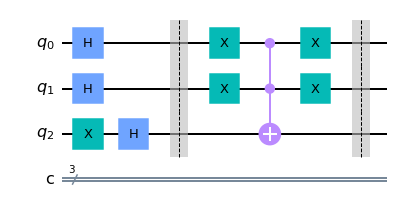

In [155]:
# implement tha oracle for the 2 qubit algorithm
# it should phase flip the item which is the answer to the search
def oracle(circuit, nb_qubits) :
    if nb_qubits == 2:
        # search state is set to 00
        circuit.x([0, 1])
        circuit.ccx(0, 1, 2)
        circuit.x([0, 1])
    else :
        circuit.cz(2, 0)
        circuit.cz(1, 0)

# execute oracle
oracle(circuit, nb_qubits)

circuit.barrier()

circuit.draw('mpl')

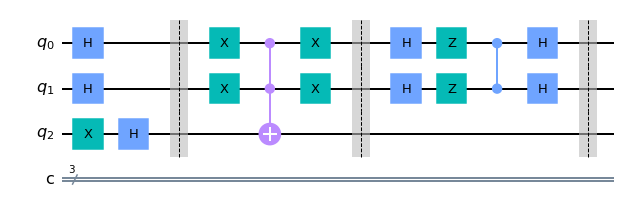

In [156]:
# then we have to apply the grover operator into the qubits which will go the state closer to search state we seek
# this means that the amplitude of the search will grow in abs value, in contrast with the others which will be reduced
# Grover operator should phase flip all states in superposition, except the 0th one ket 00

def grover_operator(circuit, nb_qubits) :
    if nb_qubits == 2:
        circuit.h([0, 1])
        circuit.z([0, 1])
        circuit.cz(0, 1)
        circuit.h([0, 1])
    else :
        circuit.h(range(0, nb_qubits))
        circuit.x(range(0, nb_qubits))
        circuit.h(0)
        circuit.mct([1, 2], 0)
        circuit.h(0)
        circuit.x(range(0, nb_qubits))
        circuit.h(range(0, nb_qubits))

grover_operator(circuit, nb_qubits)

circuit.barrier()

circuit.draw('mpl')

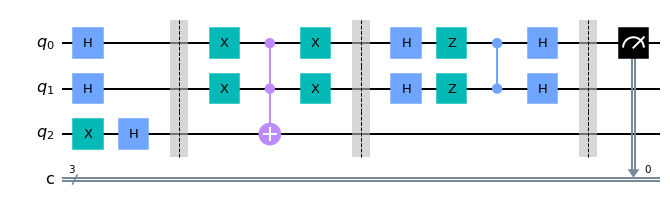

In [157]:
# finally we need to simulate the results
circuit.measure(range(nb_qubits - 1), range(nb_qubits - 1))

circuit.draw('mpl')

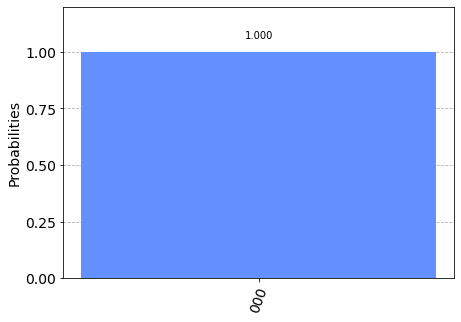

In [158]:
# simulate results
from qiskit import Aer
simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)